In [1]:
from math import e, factorial,log, gamma, sqrt, floor
from matplotlib import pyplot as pt
from numpy import linspace, correlate, average
from IPython.display import Markdown
from analysis import *

In [2]:
Ttx = 23
Trx = 60
Tn = 100
Tw = 1000
pt.rcParams["figure.figsize"] = (20,10)

## Networking disabled

1.0
Success probability evts: 0.089511
-----------------------------------------------------------
P0w= 0.910343;Hist[0]= 0.168374
PB2= 0.900661
PS1= 0.099546
PB*PS= 0.089657
rt1 = 39.159166 B/s
P(At least 1 beacon during Tw)= 0.831626
-----------------------------------------------------------
1.0000000000000002
Success probability evts: 0.160633
-----------------------------------------------------------
P0w= 0.839223;Hist[0]= 0.026510
PB2= 0.800097
PS1= 0.200947
PB*PS= 0.160777
rt1 = 34.786834 B/s
P(At least 1 beacon during Tw)= 0.973490
-----------------------------------------------------------
1.0000000000000002
Success probability evts: 0.208989
-----------------------------------------------------------
P0w= 0.790548;Hist[0]= 0.004538
PB2= 0.699872
PS1= 0.299271
PB*PS= 0.209452
rt1 = 30.429230 B/s
P(At least 1 beacon during Tw)= 0.995462
-----------------------------------------------------------
0.9999999999999999
Success probability evts: 0.240404
----------------------------

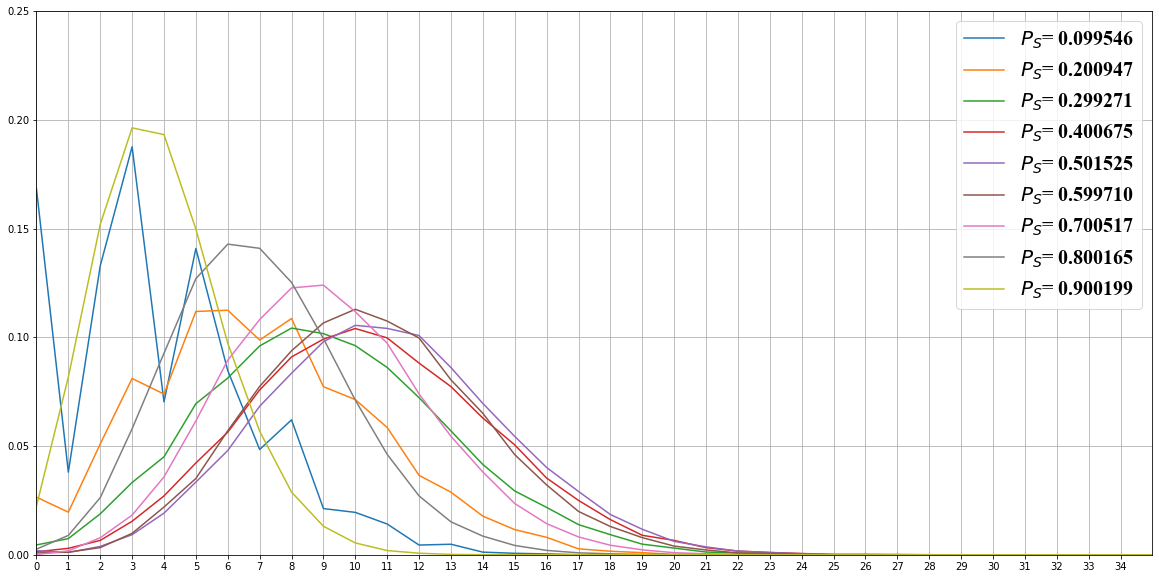

In [3]:
h1 = []
cmp = []
for i in range(1,10):
    f1 = open("r%d-d0-result.txt"%i)
    raw1 = f1.read()
    f1.close()

    f2 = open("r%d-d1-result.txt"%i)
    raw2 = f2.read()
    f2.close()
    
    Eb1,Es1,En1 = computeEvents(raw1,Ttx,Trx,Tn)
    Eb2,Es2,En2 = computeEvents(raw2,Ttx,Trx,Tn)
    
    wnds1 = genWindowHistogram(raw1,raw2,1000,Trx)
    Ps = checkSuccess(raw2,raw1)*Ttx/(Eb1*Ttx+En1*Tn+Es1*Trx)
    print("Success probability evts: %.6f"%(Ps))
    print('-----------------------------------------------------------')
    Ps1 = Es1*Trx/(Eb1*Ttx+En1*Tn+Es1*Trx)
    Pb2 = Eb2*Ttx/(Eb2*Ttx+En2*Tn+Es2*Trx)
    rt1 = Pb2/(Ttx/1000)
    P0w = Pb2*(1-Ps1)+Ps1*(1-Pb2)+(1-Ps1)*(1-Pb2)
    
    print("P0w= %.6f;Hist[0]= %.6f"%(P0w,wnds1[0]))
    h1.append(wnds1[0])
    cmp.append(P0w)
    print("PB2= %.6f"%(Pb2))
    print("PS1= %.6f"%(Ps1))
    print("PB*PS= %.6f"%(Pb2*Ps1))
    print("rt1 = %.6f B/s"%(rt1))
    print("P(At least 1 beacon during Tw)= %.6f"%(1-wnds1[0]))
    
    print('-----------------------------------------------------------')
    
    pt.plot(range(len(wnds1)),wnds1,label=r"$P_{S}$= %.6f"%(Trx*Es1/len(raw1)))

print(correlate(h1,cmp))
print('-----------------------------------------------------------')
pt.legend(prop={'family':'Times New Roman', 'size':20})
pt.axis([0,35,0,0.25])
pt.xticks(range(0,35,1), [str(n) for n in range(0,35,1)])
pt.grid(True)
pt.savefig('success_distribution_BS.pdf',dpi=300, bbox_inches='tight')
pt.show()

## Networking enabled

0.9999999999999999
Success probability evts: 0.079999
-----------------------------------------------------------
PB2= 0.799583
PS1= 0.100100
PB*PS= 0.080038
-----------------------------------------------------------
1.0
Success probability evts: 0.139704
-----------------------------------------------------------
PB2= 0.699651
PS1= 0.199658
PB*PS= 0.139691
-----------------------------------------------------------
0.9999999999999999
Success probability evts: 0.179932
-----------------------------------------------------------
PB2= 0.599245
PS1= 0.300329
PB*PS= 0.179971
-----------------------------------------------------------
1.0
Success probability evts: 0.200120
-----------------------------------------------------------
PB2= 0.500278
PS1= 0.400295
PB*PS= 0.200259
-----------------------------------------------------------
0.9999999999999999
Success probability evts: 0.202485
-----------------------------------------------------------
PB2= 0.450238
PS1= 0.450180
PB*PS= 0.202688


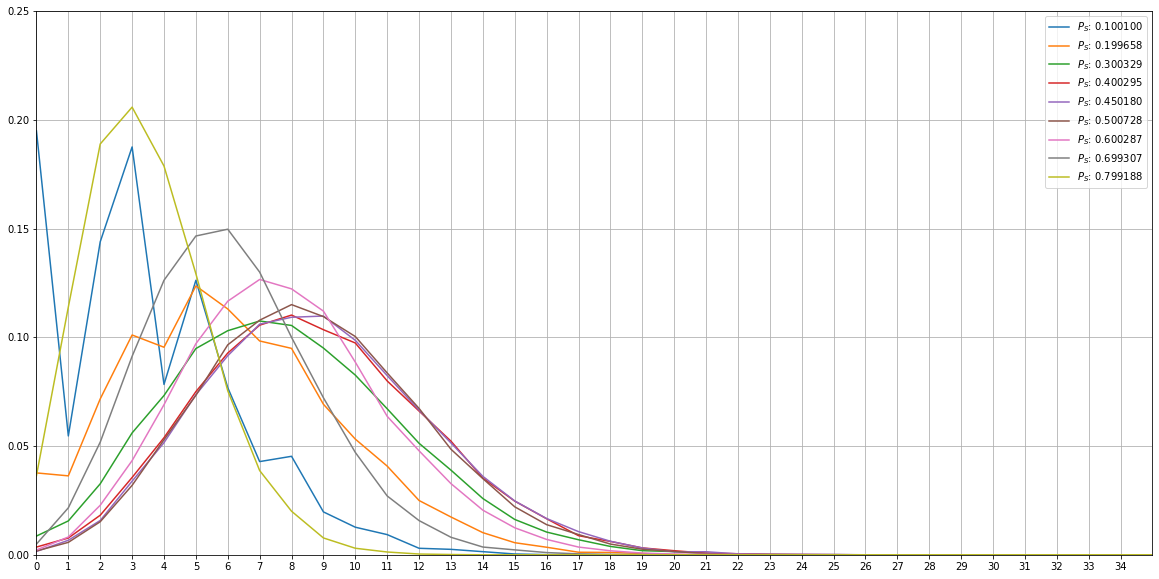

In [4]:
for i in range(1,10):
    
    f3 = open("r2%d-d0-result.txt"%i)
    raw3 = f3.read()
    f3.close()

    f4 = open("r2%d-d1-result.txt"%i)
    raw4 = f4.read()
    f4.close()
    
    Eb3,Es3,En3 = computeEvents(raw3,Ttx,Trx,Tn)
    Eb4,Es4,En4 = computeEvents(raw4,Ttx,Trx,Tn)
    wnds2 = genWindowHistogram(raw3,raw4,1000,Trx)
    Ps = checkSuccess(raw4,raw3)*Ttx/(Eb3*Ttx+En3*Tn+Es3*Trx)
    print("Success probability evts: %.6f"%(Ps))
    print('-----------------------------------------------------------')
    Ps1 = Es3*Trx/(Eb3*Ttx+En3*Tn+Es3*Trx)
    Pb2 = Eb4*Ttx/(Eb4*Ttx+En4*Tn+Es4*Trx)
    rt1 = Pb2/(Ttx/1000)
    print("PB2= %.6f"%(Pb2))
    print("PS1= %.6f"%(Ps1))
    print("PB*PS= %.6f"%(Pb2*Ps1))
    print('-----------------------------------------------------------')
    pt.plot(range(len(wnds2)),wnds2,label=r"$P_{S}$: %.6f"%(Trx*Es3/len(raw3)))

    
pt.legend()
pt.axis([0,35,0,0.25])
pt.xticks(range(0,35,1), [str(n) for n in range(0,35,1)])
pt.grid(True)
pt.savefig('success_distribution_BSN.pdf',dpi=300, bbox_inches='tight')
pt.show()

    Probability of failure

In [5]:
Pb = 0.8
Ps = 0.2
Tw = 1000
Tb = 23
Ts = 60
P0b = e**(-Pb*Tw/Tb)
P0s = e**(-Ps*Tw/Ts)
Pfail = Ps*(1-Pb) + Pb*(1-Ps) + (1-Pb)*(1-Ps)
print(P0b+P0s+P0b*P0s)
print(P0b)
print(P0s)
print(Pfail)

0.03567399334725321
7.836190355758275e-16
0.0356739933472524
0.8400000000000001
